# Concept
This year 2018 iGEM NTHU_Taiwan aims to solve the Vibrio infection in aquaculture with bio-competiotion model. We are inspired by the peroidic pattern of Lotka-Volterra model, and try to control the Vibrio population with engineered E.coli. 

We genetically modify the E.coli, giving them the ability to detect Vibrio concentration, and secrete some compound to supress Vibrio and itself. 

If the Vibrio concentration exceed a specific threshold, engineered E.coli will secrete antibacterial peptide- Nisin to kill Vibrio. Otherwise, the Vibrio concentration below the E.coli's detection threshold, engineered Ecoli will secrete suicide protein GP2 to commit suicide.  

## Math part
###  Equation

We modify from Lotka-Volterra model, with logistic population groth model, and the the decay rate of compound.

$$\begin{equation}\begin{aligned}
{{dV}\over{dt}} &= r_v V - {{r_v} \over {V_{max}}} V^2 -a VN\\
{{dA} \over {dt}} &= k_AV - \lambda_A A\\
{{dE} \over {dt}} &= bEA - cES - \lambda_E E\\
{{dN} \over {dt}} &= k_NE - \lambda_N N \\
{{dS} \over {dt}} &= k_SE - \lambda_S S
\end{aligned}\end{equation}$$


<br>

Our engineered Ecoli has the ability to detect the Vibrio concentration.

If the vibrio concentration exceed the treshold, Ecoli will secrete Nisin. Otherwise, Ecoli secrete suicide portein GP2.

$$\begin{equation}\begin{aligned}
V \lt V_t, \ \ k_N=0 \\
V \geq V_t, \ \ k_S=0 
\end{aligned}\end{equation}$$




#### Variables and parameters


    
| variable | description        | unit |
| :---     | :---------         | :--  |
| V        | Vibrio             | M    |
| A        | AHL                | M    |
| E        | E.coli             | M    |
| N        | Nisin              | M    |
| S        | suicide protein GP2| M    |

<br>
    
| parameter     | description     |   unit  |
| :---          | :---------      | :-----  |
| ${r_v}$       | secrete rate of AHL from Vibrio   | min-1 |
| ${V_{max}}$   | max capacity of vibrio            | M     |
| ${k_A}$       | secrete rate of AHL from Vibrio   | min-1 |
| ${\lambda_A}$ | decay rate of AHL                 | min-1 |
| ${r_E}$       | groth rate of E.coli              | min-1 |
| ${k_N}$       | secrete rate of Nisin from E.coli | min-1 |
| ${\lambda_N}$ | decay rate of Nisin               | min-1 |
| ${k_N}$       | secrete rate of Nisin from E.coli | min-1 |
| ${\lambda_N}$ | decay rate of Nisin               | min-1 |
| ${V_t}$       | threshold of Vibrio concentration for Ecoli detection | M |


## Code part
Use python for short life.
Matlab is another good choice, however it is unnecessary to install so much library and unusabel tool. 

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from equation import lotVolRevised
import matplotlib.pyplot as plt

#### Setting parameter 
In the modeling stage, we set the parameter with symmetry.

In order to make this model more valuable, we will firstly check them from paper. If the time avaliable, our wet lab will modify the genetic expression and give all measurments of the parameters.

In [2]:
# initial condition
vibrio_0 = 0.2
ahl_0 = 0
ecoli_0 = 0.1
nisin_0 = 0
suicide_0 = 0

params = {
   ## Vibrio and AHL associated:
    # Vibrio_GrothRate
    'rV': 0.02,
    # Vibrio_MaxCapacity
    'Vm': 1,
    # Nisin_Vibrio_Binding_Strength
    'a': 0.05,
    # Ahl_Secrete_Ratio
    'kA': 0.02,
    # Ahl_DecayRate
    'lmA': 0.01,
    
   ## Ecoli, Nisin, Suicide associated:
    # Ahl_Ecoli_Binding_Strength
    'b': 0.01,
    # Suicide_Ecoli_Binding_Strength
    'c': 0.04,
    # Ecoli_DeathRate
    'lmE': 0.01,
    # Nsin_Sectete_Ratio
    'kN': 0.02,
    # Nisin_DecayRate
    'lmN': 0.01,
    # Suicide_Secrete_Ratio
    'kS': 0.03,
    # Suicide_DeacyRate
    'lmS': 0.01,
    # Vibrio_Threshold
    # !! this parameter is pretty strange
    # bigger than ~0.5 => converge solution
    # smaller than ~0.5 => oscillating solution
    'thesV': 0.3,
    
   ## Mechnical:
    # Dilution_Rate
    'D': 0
}

# load data
t_span = [0,10000] 
y_0 = [vibrio_0, ahl_0, ecoli_0, nisin_0, suicide_0]


sol = solve_ivp(
    lambda t_span, y_0: lotVolRevised(t_span, y_0,**params),t_span, y_0)

### Draw the figure 

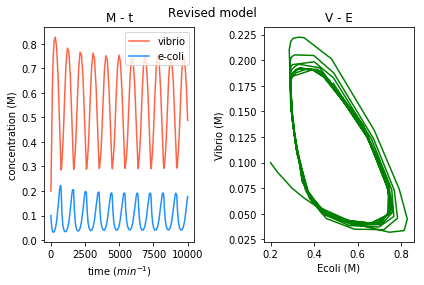

In [3]:
# create a figure and add two subplot
fig, (ax1,ax2) = plt.subplots(1,2)
# figure title
fig.suptitle('Revised model')
# title of subplot 1
ax1.set_title('M - t')
ax1.plot(sol.t, sol.y[0], 'tomato', label='vibrio')
ax1.plot(sol.t, sol.y[2], 'dodgerblue', label='e-coli')
ax1.set(ylabel='concentration (M)')
ax1.set(xlabel='time ($min^{-1}$)')
# open the legend box and auto adjust location
ax1.legend(loc='best')
ax1.grid()

# title of subplot 2
ax2.set_title('V - E')
ax2.plot(sol.y[0], sol.y[2],'g')
ax2.set(ylabel='Vibrio (M)')
ax2.set(xlabel='Ecoli (M)')
ax1.grid()
# prevention of firgure overlap
plt.tight_layout()
plt.show()